Dataset Preview:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal       target  
0   2     3  Not Disease  
1   0     3  Not Disease  
2   0     3  Not Disease  
3   1     3  Not Disease  
4   3     2  Not Disease  

 KNN Model Accuracy: 0.9366

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94       102
           1       0.92      0.95      0.94       103

    accuracy                           0.94       205
   macro avg       0.94      0.94      0.94       205
weighted

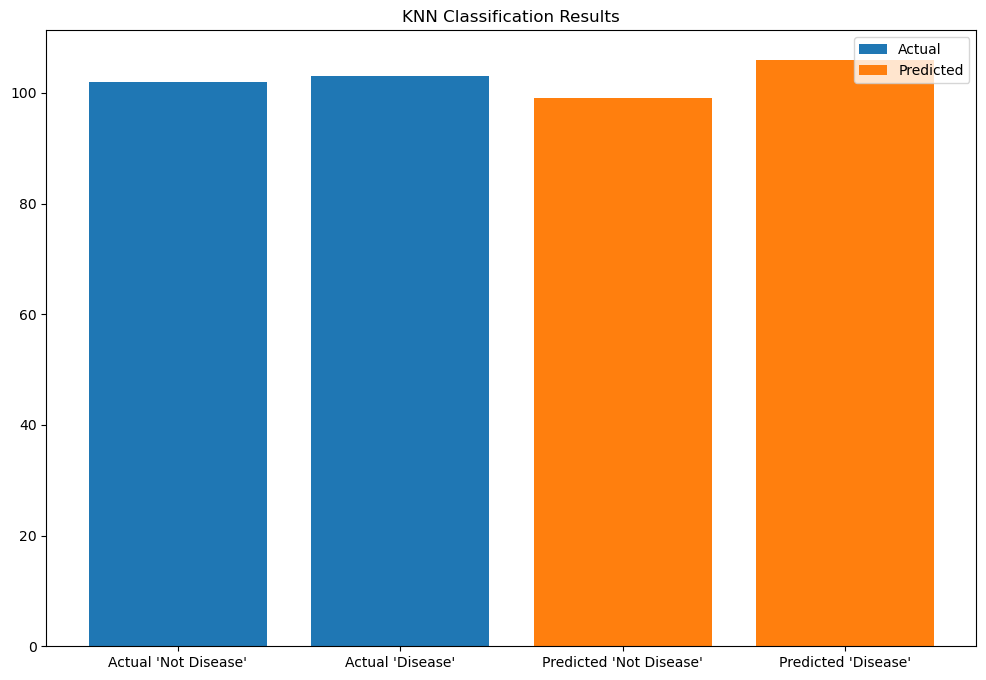

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
file_path =r"C:\Users\santhosh\Downloads\heartds.xlsx"
df = pd.read_excel(file_path)
print("Dataset Preview:")
print(df.head())
df['target'] = df['target'].map({'Not Disease': 0, 'Disease': 1})
df = df.dropna()
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n KNN Model Accuracy: {accuracy:.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
plt.figure(figsize=(12,8))
plt.bar(["Actual 'Not Disease'", "Actual 'Disease'"], np.bincount(y_test), label="Actual")
plt.bar(["Predicted 'Not Disease'", "Predicted 'Disease'"], np.bincount(y_pred), label="Predicted")
plt.title("KNN Classification Results")
plt.legend()
plt.show() 